In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train =  pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

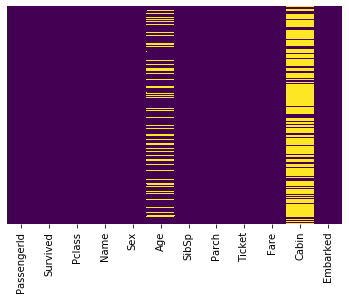

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap='viridis')

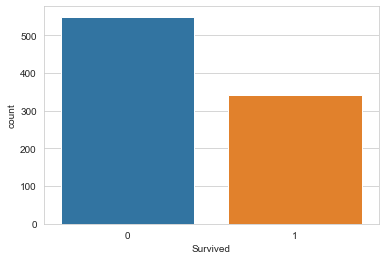

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train)

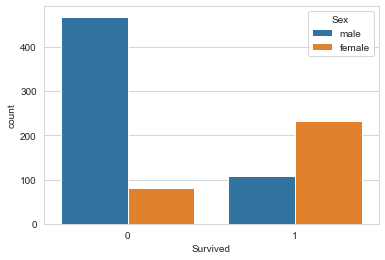

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex',data = train)

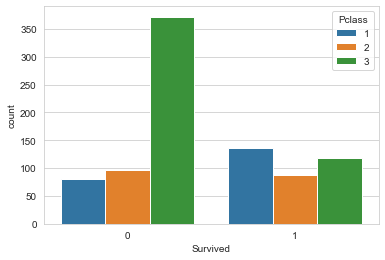

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data = train)

''

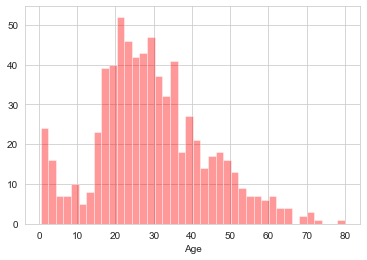

In [14]:
sns.distplot(train['Age'].dropna(),kde= False,color='r',bins=40)
;

''

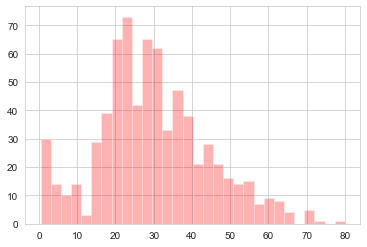

In [15]:
train['Age'].hist(bins= 30,color='r', alpha = 0.3)
;

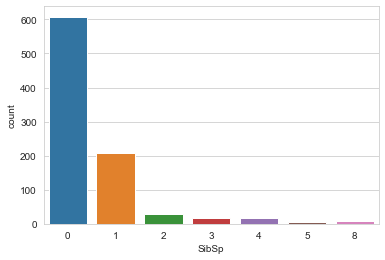

In [16]:
sns.countplot(x='SibSp',data = train)

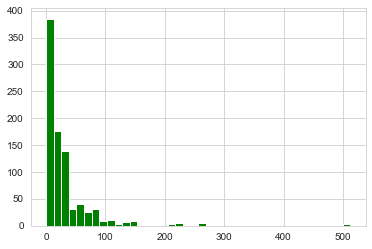

In [17]:
train['Fare'].hist(color='green', bins = 40)

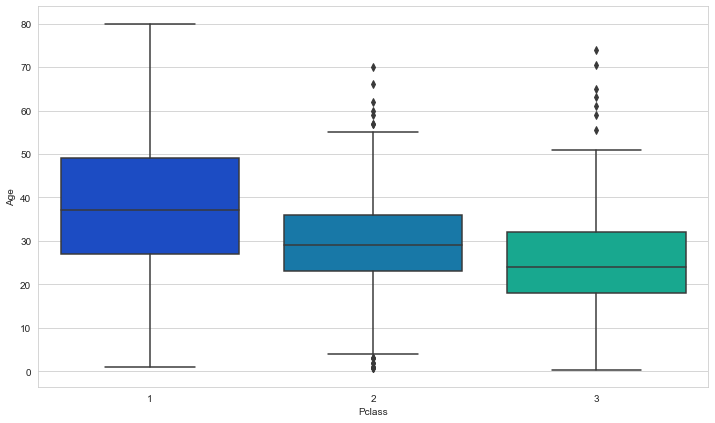

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y ='Age',data = train,palette='winter')

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
                

In [20]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

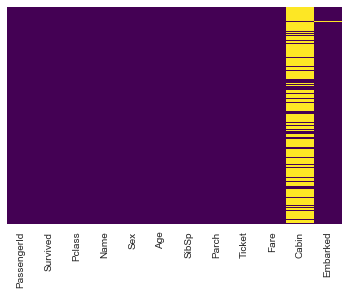

In [21]:
sns.heatmap(train.isnull(),yticklabels = False, cbar= False, cmap='viridis')

In [23]:
train.drop('Cabin', axis =1, inplace = True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
